# Dataset boolean4: VP conjoined by and

Generating sentences of the form

- 1) **c VERB1 COMPLEMENT1 AND  VERB2 COMPLEMENT2, c didn't VERB1 COMPLEMENT1** (contradiction)
- 1) **c VERB1 COMPLEMENT1 AND  VERB2 COMPLEMENT2, c didn't VERB2 COMPLEMENT2** (contradiction)


- 2) **c VERB1 COMPLEMENT1 AND  VERB2 COMPLEMENT2, c didn't VERB3 COMPLEMENT3** (non-contradiction)
- 2) **c VERB1 COMPLEMENT1 AND  VERB2 COMPLEMENT2, d didn't VERB1 (VERB2) COMPLEMENT1 (COMPLEMENT1)** (non-contradiction)


In [1]:
import numpy as np
import pandas as pd
from word_lists import male_names, female_names, name_list
from word_lists import professions, color_list, city_list
from word_lists import verbs_third_person_past, verbs_third_person_past_CONTEXT
from word_lists import verbs_third_person_past_infinitiv_neg, positive_personality_list
import os
import inspect
import sys
import itertools

almost_current = os.path.abspath(inspect.getfile(inspect.currentframe()))
currentdir = os.path.dirname(almost_current)
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

from plots.functions import plot_histogram_from_labels # noqa

% matplotlib inline

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected

In [2]:
def get_new_item(item_list, src_list):
    size = len(src_list)
    new_item = src_list[np.random.choice(size)]
    while new_item in item_list: 
        new_i = np.random.choice(size)
        new_item = src_list[new_i]
    return new_item

In [3]:
for i in range(len(name_list)):
    name = get_new_item([], name_list)
    new_name = get_new_item([name], name_list)
    assert name != new_name and name in name_list and new_name in name_list

In [4]:
def replace_words(input_str, person, color, city, profession, pred):
    input_str = input_str.replace("PERSON's", person + "'s")
    input_str = input_str.replace("PERSON", person)    
    input_str = input_str.replace("COLOR", color)
    input_str = input_str.replace("CITY", city)
    input_str = input_str.replace("PROFESSION", profession)
    input_str = input_str.replace("PRED", pred)
    return input_str

In [5]:
print(replace_words("PERSON's house", "Felipe", "blue", "Cluj", "saylor", "brave"))
print(replace_words("a COLOR car", "Felipe", "blue", "Cluj", "saylor", "brave"))
print(replace_words("PERSON a COLOR car", "Felipe", "blue", "Cluj", "saylor", "brave"))
print(replace_words("me drive PERSON's COLOR car", "Felipe", "blue", "Cluj", "saylor", "brave"))
print(replace_words("what PERSON comment about CITY", "Felipe", "blue", "Cluj", "saylor", "brave"))
print(replace_words("of the being a PROFESSION", "Felipe", "blue", "Cluj", "saylor", "brave"))
print(replace_words("a PRED person", "Felipe", "blue", "Cluj", "saylor", "brave"))

Felipe's house
a blue car
Felipe a blue car
me drive Felipe's blue car
what Felipe comment about Cluj
of the being a saylor
a brave person


In [6]:
upper_bound = 11000 / 2

- 1) **c VERB1 COMPLEMENT1 AND  VERB2 COMPLEMENT2, c didn't VERB1 COMPLEMENT1** (contradiction)
- 1) **c VERB1 COMPLEMENT1 AND  VERB2 COMPLEMENT2, c didn't VERB2 COMPLEMENT2** (contradiction)

In [7]:
all_sentences_1 = []
for i in range(int(upper_bound)):
    person = get_new_item([], name_list)
    person1 = get_new_item([person], name_list)
    person2 = get_new_item([person, person1], name_list)
    pred1 = get_new_item([], positive_personality_list)
    pred2 = get_new_item([pred1], positive_personality_list)
    color1 = get_new_item([], color_list)
    color2 = get_new_item([color1], color_list)
    city1 =  get_new_item([], city_list)
    city2 =  get_new_item([city1], city_list)
    profession1 = get_new_item([], professions)
    profession2 = get_new_item([profession1], professions)
    verb1 = get_new_item([], verbs_third_person_past)
    verb2 = get_new_item([verb1], verbs_third_person_past)
    context = verbs_third_person_past_CONTEXT[verb1]
    complement1 = get_new_item([], context)
    complement1 = replace_words(complement1, person1, color1, city1, profession1, pred1)
    context = verbs_third_person_past_CONTEXT[verb2]
    complement2 = get_new_item([], context)
    complement2 = replace_words(complement2, person2, color2, city2, profession2, pred2)
    if i % 2 == 0:
        verb3 = verbs_third_person_past_infinitiv_neg[verb1]
        complement3 = complement1
    else:
        verb3 = verbs_third_person_past_infinitiv_neg[verb2]
        complement3 = complement2
    sentence = "{} {} {} and {} {},{} {} {}".format(person, verb1, complement1, verb2, complement2, person, verb3, complement3)
    all_sentences_1.append(sentence)

all_sentences_1 = [sentence.split(",") + [1] for sentence in all_sentences_1]

for sentence in all_sentences_1[0:10]:
    print(sentence)

['Virgil flew to Vaslui and hurt me', "Virgil didn't fly to Vaslui", 1]
['Gertrude bet on the game and wrote me an email', "Gertrude didn't write me an email", 1]
['Melanie found him and hung up on me', "Melanie didn't find him", 1]
['Gloria won the game and bought a watch', "Gloria didn't buy a watch", 1]
["Nicole knew Melissa's secret and taught middle school science", "Nicole didn't know Melissa's secret", 1]
["Wanda forgot about April's past and found him", "Wanda didn't find him", 1]
['Cynthia hit him and drew ahead of the other runners', "Cynthia didn't hit him", 1]
['Jon showed my new photos and bet on the wining horse', "Jon didn't bet on the wining horse", 1]
['Debra gave Alfred a orange car and ran from Barcelona to Reghin', "Debra didn't give Alfred a orange car", 1]
["Harriet brought me out of Erik's house and was a fan of Derrick's work", "Harriet wasn't a fan of Derrick's work", 1]


- 2) **c VERB1 COMPLEMENT1 AND  VERB2 COMPLEMENT2, c didn't VERB3 COMPLEMENT3** (non-contradiction)
- 2) **c VERB1 COMPLEMENT1 AND  VERB2 COMPLEMENT2, d didn't VERB1 (VERB2) COMPLEMENT1 (COMPLEMENT1)** (non-contradiction)

In [8]:
all_sentences_2 = []
for i in range(int(upper_bound)):
    person = get_new_item([], name_list)
    person1 = get_new_item([person], name_list)
    person2 = get_new_item([person, person1], name_list)
    person3 = get_new_item([person, person1, person2], name_list)
    other_person = get_new_item([person, person1, person2, person3], name_list)
    color1 = get_new_item([], color_list)
    color2 = get_new_item([color1], color_list)
    color3 = get_new_item([color1, color2], color_list)
    city1 =  get_new_item([], city_list)
    city2 =  get_new_item([city1], city_list)
    city3 = get_new_item([city1, city2], city_list)
    profession1 = get_new_item([], professions)
    profession2 = get_new_item([profession1], professions)
    profession3 = get_new_item([profession1, profession2], professions)
    pred1 = get_new_item([], positive_personality_list)
    pred2 = get_new_item([pred1], positive_personality_list)
    pred3 = get_new_item([pred1, pred2], positive_personality_list)
    verb1 = get_new_item([], verbs_third_person_past)
    verb2 = get_new_item([verb1], verbs_third_person_past)
    verb3 = get_new_item([verb1, verb2], verbs_third_person_past)
    context = verbs_third_person_past_CONTEXT[verb1]
    complement1 = get_new_item([], context)
    complement1 = replace_words(complement1, person1, color1, city1, profession1, pred1)
    context = verbs_third_person_past_CONTEXT[verb2]
    complement2 = get_new_item([], context)
    complement2 = replace_words(complement2, person2, color2, city2, profession2, pred2)
    context = verbs_third_person_past_CONTEXT[verb3]
    complement3 = get_new_item([], context)
    complement3 = replace_words(complement3, person3, color3, city3, profession3, pred3)
    if i % 3 == 0:
        new_person = person
        verb3 = verbs_third_person_past_infinitiv_neg[verb3]
    elif i % 3 == 1:
        new_person = other_person
        verb3 = verbs_third_person_past_infinitiv_neg[verb1]
        complement3 = complement1
        
    else:
        new_person = other_person
        verb3 = verbs_third_person_past_infinitiv_neg[verb2]
        complement3 = complement2
    sentence = "{} {} {} and {} {},{} {} {}".format(person, verb1, complement1, verb2, complement2, new_person, verb3, complement3)
    all_sentences_2.append(sentence)

all_sentences_2 = [sentence.split(",") + [0] for sentence in all_sentences_2]

for sentence in all_sentences_2[0:10]:
    print(sentence)

['Micheal dug a hole and swam out toward the gray boat', "Micheal didn't blow me off", 0]
['Marvin got me lying and fought the law', "Sheila didn't get me lying", 0]
['Neil met me and felt threatened', "Wendy didn't feel threatened", 0]
['Charlie cut my hair and met her', "Charlie didn't choose to live in Mangalia", 0]
['Roberta grew up and began screaming', "Alice didn't grow up", 0]
['Deborah sent me a letter and sat on the floor', "Guy didn't sit on the floor", 0]
['Lena hung up on me and fell to the floor', "Lena didn't say funny things", 0]
['Max felt an outsider and bent the orange rod', "Jordan didn't feel an outsider", 0]
['Chris slept the night and fell in love with Zachary', "Pedro didn't fall in love with Zachary", 0]
['Darryl dreamed of running in Craiova and bought a salmon car', "Darryl didn't catch a blue fish", 0]


In [9]:
np.random.shuffle(all_sentences_1)
np.random.shuffle(all_sentences_2)


size1 = len(all_sentences_1)
size2 = len(all_sentences_2)


all_sentences = all_sentences_1 + all_sentences_2
size = len(all_sentences)

print("type 1 size = {}".format(size1))
print("type 2 size = {}".format(size2))
print("total size = {}".format(size))

type 1 size = 5500
type 2 size = 5500
total size = 11000


### Generating a train DataFrame with 10000 examples and a test DataFrame with 1000 examples 

In [10]:
sentence_1 = [triple[0] for triple in all_sentences]
sentence_2 = [triple[1] for triple in all_sentences]
label = [triple[2] for triple in all_sentences]

df_dict = {"sentence1": sentence_1,
           "sentence2": sentence_2,
           "label": label}
        
df = pd.DataFrame(df_dict)
df = df[["sentence1", "sentence2", "label"]]
df = df.sample(frac=1).reset_index(drop=True)

df_train = df.iloc[:10000]
df_test = df.iloc[10000:]

df.tail()    

,sentence1,sentence2,label
10995,Tiffany wore a mango hat and hurt him,Freddie didn't wear a mango hat,0
10996,Wesley thought I was living in Bucharest and s...,Wesley didn't think I was living in Bucharest,1
10997,Cory kept saying this was crazy and felt threa...,Cory didn't keep saying this was crazy,1
10998,Philip came at noon and found her,Philip didn't hold him close,0
10999,Mathew felt threatened and thought I was helpi...,Mathew didn't feel threatened,1


#### Looking at the label distribution

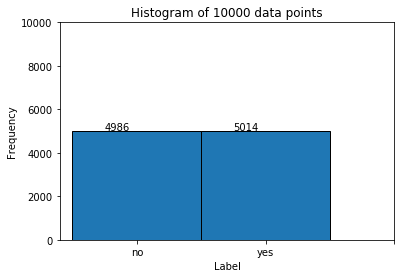

In [11]:
train_label = df_train["label"].values
plot_histogram_from_labels(train_label, ["no", "yes"], "boolean4_train.png")

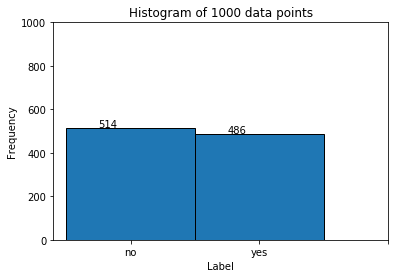

In [12]:
test_label = df_test["label"].values
plot_histogram_from_labels(test_label, ["no", "yes"], "boolean4_test.png")

### Saving to CSV

In [13]:
df_train.to_csv("boolean4_train.csv", index=False)
df_test.to_csv("boolean4_test.csv", index=False)